## Data Aggregation 

#### What to do when your data is too big
- Aggregate data(mean, median, etc.)
- sample a random subset of data
<br>  -  sometimes you dont need all data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('obama.csv',parse_dates = ['year_month']) #Series of time stamp
data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


### Dara Aggregation example
- A scatter plot of apporoval ratings
- Mean and median of approval ratings

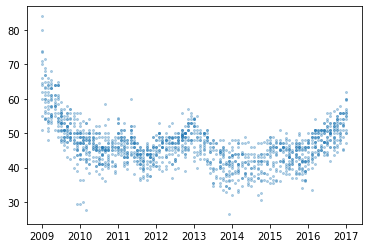

In [6]:
plt.plot(data.year_month,data.approve_percent,'o', markersize = 2,alpha = 0.3 )
plt.show()

In [7]:
data_mean = data.groupby('year_month').mean()
data_median = data.groupby('year_month').median()

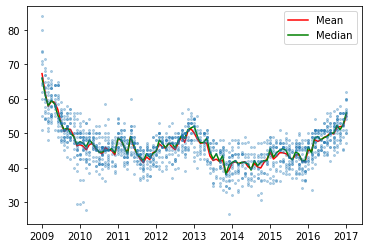

In [8]:
plt.plot(data_mean.index,data_mean.approve_percent,'red')
plt.plot(data_median.index, data_median.approve_percent, 'green')
plt.legend(['Mean', 'Median'])
plt.plot(data.year_month,data.approve_percent,'o', markersize = 2, alpha = 0.3)
plt.show()

In [57]:
# Percentiles:
# Drop the survey_orgnaization column, otherwise quantile would fail
data.drop(columns='survey_organization', inplace=True)

data_25 = data.groupby('year_month').quantile(0.25) # 25 percentile
data_75 = data.groupby('year_month').quantile(0.75) # 75 percentile

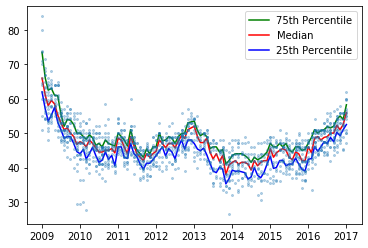

In [43]:
plt.plot(data_75.index , data_75.approve_percent, 'green')
plt.plot(data_median.index, data_median.approve_percent, 'red')
plt.plot(data_25.index , data_25.approve_percent, 'blue')
plt.plot(data.year_month, data.approve_percent,'o', markersize = 2, alpha = 0.3)
plt.legend(['75th Percentile', 'Median', '25th Percentile'])
plt.show()

In [9]:
data_big = pd.read_csv('obama_too_big.csv',parse_dates = ['year_month']) #Series of time stamp
data_big.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,Generated Data,67.0,31.0
1,2009-01-01,Harris (Phone),60.0,29.0
2,2009-01-01,Generated Data,65.9,19.1
3,2009-01-01,Generated Data,64.6,18.4
4,2009-01-01,Generated Data,83.3,11.7


In [10]:
data = pd.read_csv('obama.csv',parse_dates = ['year_month']) #Series of time stamp
data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


In [11]:
data.shape

(1530, 4)

In [12]:
data_big.shape

(65499, 4)

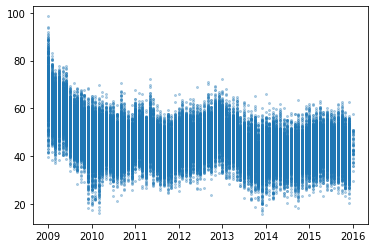

In [13]:
plt.plot(data_big.year_month,data_big.approve_percent,'o', markersize = 2, alpha = 0.3)
plt.show()

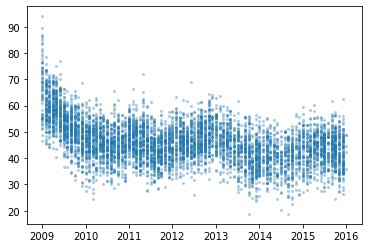

In [56]:
sampled = data_big.sample(frac = 0.1)
# Use n = 10000 to specify a number of samples instead.
plt.plot(sampled.year_month,sampled.approve_percent,'o', markersize = 2, alpha = 0.3)
plt.show()